# Food Demand Forecasting
```
Demand forecasting is a key component to every growing online business. Without proper demand forecasting processes in place, it can be nearly impossible to have the right amount of stock on hand at any given time. A food delivery service has to deal with a lot of perishable raw materials which makes it all the more important for such a company to accurately forecast daily and weekly demand.

Too much inventory in the warehouse means more risk of wastage, and not enough could lead to out-of-stocks — and push customers to seek solutions from your competitors. In this challenge, get a taste of demand forecasting challenge using a real dataset.
```

### Import Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.utils import resample
from sklearn import preprocessing

### Read Data

In [5]:
# Read test data
test=pd.read_csv("C:\\Users\\NAYANA\\Downloads\\test_QoiMO9B.csv")

In [6]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [7]:
# read train data
train=pd.read_csv("C:\\Users\\NAYANA\\Downloads\\train_GzS76OK\\train.csv")

In [8]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


### Data Understanding

In [10]:
test.columns # columns in the teat DataFrame

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured'],
      dtype='object')

In [11]:
train.columns # columns in the train DataFrame

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders'],
      dtype='object')

In [12]:
test.shape

(32573, 8)

In [13]:
print("Number of columns in test data :", test.shape[0])
print("Number of columns in test data :", test.shape[1])

Number of columns in test data : 32573
Number of columns in test data : 8


In [14]:
train.shape

(456548, 9)

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


**About test data**

Their is no missing values in the test dataset

It only includes numerical columns

In [17]:
print("Number of columns in test data :", train.shape[0])
print("Number of columns in test data :", train.shape[1])

Number of columns in test data : 456548
Number of columns in test data : 9


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


**About test data**

Thier is no missing values in train dataset

All columns are numerical

#### Statistical Summary

In [21]:
test.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
count,3.257300e+04,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000
mean,1.248476e+06,150.477819,81.901728,2032.067909,341.854440,356.493615,0.066435,0.081356
std,1.441580e+05,2.864072,45.950455,547.199004,153.893886,155.150101,0.249045,0.273385
min,1.000085e+06,146.000000,10.000000,1062.000000,67.900000,89.240000,0.000000,0.000000
25%,1.123969e+06,148.000000,43.000000,1558.000000,214.430000,243.500000,0.000000,0.000000
50%,1.247296e+06,150.000000,76.000000,1993.000000,320.130000,321.130000,0.000000,0.000000
75%,1.372971e+06,153.000000,110.000000,2569.000000,446.230000,455.930000,0.000000,0.000000
max,1.499996e+06,155.000000,186.000000,2956.000000,1113.620000,1112.620000,1.000000,1.000000


From the statistical summary of test data;

In **checkout_price** the mean values and median value have some difference it may occur due to **outliers**, same as in **base_price** also

In [23]:
train.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


From the statistical summary in train data;

In **checkout_price** the mean values and median value have some difference it may occur due to **outliers**, same as in **base_price** also

### Data Preprocessing

#### Missing Values

In [27]:
test.isna().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
dtype: int64

Their is **no missing value** in test dataset

In [29]:
train.isna().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

Their is **no missing value** in train dataset

#### Duplicate Values

##### Rows

In [33]:
test.duplicated().sum()

0

In [34]:
train.duplicated().sum()

0

##### Columns

In [36]:
test.columns.duplicated().sum()

0

In [37]:
train.columns.duplicated().sum()

0

Their is no duplicate values in the test and train data

#### Display Outliers in boxplot:

##### Numerical columns

In [41]:
# Identify set of numerical columns in test data
num_test=test.select_dtypes(include='number')
num_col1=num_test.columns.tolist()
num_col1

['id',
 'week',
 'center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured']

In [42]:
# Identify set of numerical columns in train data
num_train=train.select_dtypes(include='number')
num_col2=num_train.columns.tolist()
num_col2

['id',
 'week',
 'center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'num_orders']

##### Categorical Columns

In [44]:
# Identify set of categorical columns in test data
cat_test=test.select_dtypes(include='object')
cat_col1=cat_test.columns.tolist()
cat_col1

[]

In [45]:
# Identify set of categorical columns:
cat_train=train.select_dtypes(include='object')
cat_col2=cat_train.columns.tolist()
cat_col2

[]

From the above information we have no categorical columns that is **all the columns contain numerical values.**

##### Outliers

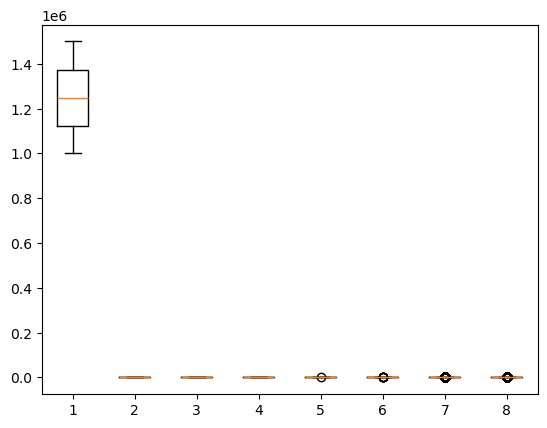

In [48]:
plt.boxplot(num_test)
plt.show()

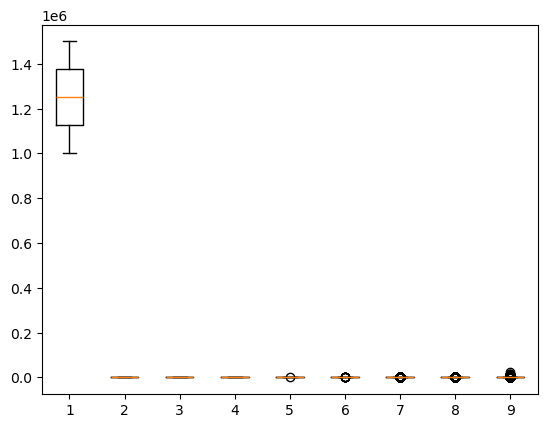

In [49]:
plt.boxplot(num_train)
plt.show()

#### Scaling

In [51]:
from sklearn.preprocessing import StandardScaler # for scaling using standard scaler

In [52]:
std_scaler = StandardScaler()
test[num_col1]=std_scaler.fit_transform(test[num_col1])
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,-1.527818,-1.563469,-0.58546,-0.268769,-1.193987,-1.272230,-0.266764,-0.297591
1,-0.841255,-1.563469,-0.58546,-0.071397,-1.180991,-1.272230,-0.266764,-0.297591
2,-0.248126,-1.563469,-0.58546,0.926427,-1.200290,-1.272037,-0.266764,-0.297591
3,-1.149990,-1.563469,-0.58546,1.094558,-1.168579,-1.253474,-0.266764,-0.297591
4,1.057537,-1.563469,-0.58546,-1.432897,-1.156168,-1.241163,-0.266764,-0.297591


In [53]:
std_scaler = StandardScaler()
train[['id', 'week',	'center_id', 'meal_id',	'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured']]=std_scaler.fit_transform(train[['id', 'week',	'center_id', 'meal_id',	'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured']])
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,0.896845,-1.776494,-0.589577,-0.254535,-1.277687,-1.256048,-0.297187,-0.350123,177
1,1.502326,-1.776494,-0.589577,-0.057246,-1.277687,-1.358465,-0.297187,-0.350123,270
2,0.671213,-1.776494,-0.589577,0.940160,-1.290568,-1.358278,-0.297187,-0.350123,189
3,0.610550,-1.776494,-0.589577,0.209460,0.047477,0.518763,-0.297187,-0.350123,54
4,1.374349,-1.776494,-0.589577,1.108221,-0.580222,-0.694746,-0.297187,-0.350123,40


##### Univariate Analysis

understanding the distribution and properties of individual variables.

In [56]:
import math

In [57]:
# # Define the number of columns and rows for the subplots
# n_cols = 1  # Number of subplots per row
# n_rows = math.ceil(len(num_col2) / n_cols)  # Calculate required number of rows

# # Create subplots
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# # Flatten axes array to easily iterate (even if multiple rows)
# axes = axes.flatten()

# # Plot histograms for each column
# for i, col in enumerate(num_col2):
#     sns.histplot(num_train[col], kde=True, ax=axes[i], color='blue', edgecolor='black')  # Pass the data for each column
#     axes[i].set_title(f"{col}")
#     axes[i].set_xlabel(col)

# # Hide any unused subplots (if the number of columns isn't a multiple of n_cols)
# for j in range(i + 1, len(axes)):
#     axes[j].set_visible(False)

# plt.tight_layout()
# plt.show()

##### Bivariate ANalysis

Relationship between an independent variable and the target variable

In [60]:
# # Define the number of columns and rows for the subplots
# n_cols = 1  # Number of subplots per row
# n_rows = math.ceil(len(num_col2) / n_cols)  # Calculate required number of rows

# # Create subplots
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
# axes = axes.flatten()

# # Plot scatter plots with regression lines for each numerical feature against 'num_orders'
# for i, col in enumerate(num_col2):
#     sns.regplot(x=num_train[col], y=train['num_orders'], ax=axes[i], scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
#     axes[i].set_title(f"Scatter Plot with Trend Line: {col} vs. num_orders")
#     axes[i].set_xlabel(col)
#     axes[i].set_ylabel('num_orders')

# # Hide any unused subplots (if the number of columns isn't a multiple of n_cols)
# for j in range(i + 1, len(axes)):
#     axes[j].set_visible(False)

# plt.tight_layout()
# plt.show()

### EDA

##### Correlation Matrix

In [63]:
num_train.corr()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
id,1.000000,0.002225,0.002641,0.000488,0.001941,0.002909,0.002001,0.003111,0.000702
week,0.002225,1.000000,-0.003450,0.019814,0.026581,0.028614,-0.000841,-0.008263,-0.017210
center_id,0.002641,-0.003450,1.000000,0.009893,0.001348,0.000604,0.013658,-0.005043,-0.053035
meal_id,0.000488,0.019814,0.009893,1.000000,0.010748,0.002605,0.013402,0.016354,0.010597
checkout_price,0.001941,0.026581,0.001348,0.010748,1.000000,0.953389,0.004818,-0.057184,-0.282108
base_price,0.002909,0.028614,0.000604,0.002605,0.953389,1.000000,0.171173,0.057156,-0.222306
emailer_for_promotion,0.002001,-0.000841,0.013658,0.013402,0.004818,0.171173,1.000000,0.390534,0.277147
homepage_featured,0.003111,-0.008263,-0.005043,0.016354,-0.057184,0.057156,0.390534,1.000000,0.294490
num_orders,0.000702,-0.017210,-0.053035,0.010597,-0.282108,-0.222306,0.277147,0.294490,1.000000


Correlation betweeen **base_price** and **checkout_price** is 0.953389 which means they are highly correlated. so we can drop any of the column.

<Axes: xlabel='num_orders', ylabel='count'>

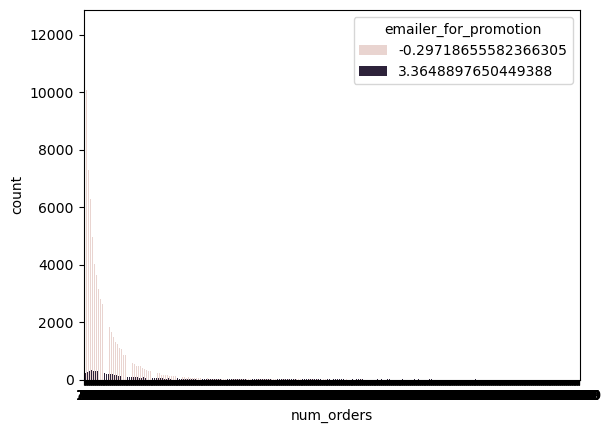

In [65]:
sns.countplot(data=train, x="num_orders", hue="emailer_for_promotion")

<Axes: xlabel='num_orders', ylabel='count'>

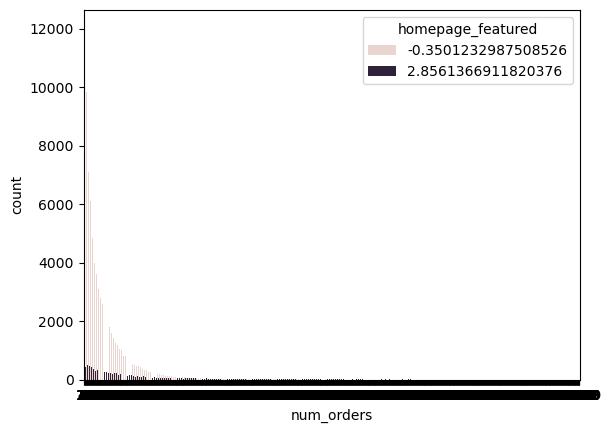

In [66]:
sns.countplot(data=train, x="num_orders", hue="homepage_featured")

### Machine Learning Model Building

In [68]:
X = train.drop('num_orders',axis=1)
y = train['num_orders']

In [69]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(random_state=0)

In [70]:
rfc.fit(X, y)
y_pred_rfc = rfc.predict(test) # Make predictions on the test data

In [71]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestRegressor
# # Create models
# log_reg = LogisticRegression() # Create logistic regression model
# knn = KNeighborsClassifier(n_neighbors=5) # Create a KNN classifier

# # Train models
# log_reg.fit(X, y)
# knn.fit(X, y)

# # Make predictions on the test data
# y_pred_log_reg = log_reg.predict(test.drop(['num_orders'],axis=1))
# y_pred_knn = knn.predict(test.drop(['num_orders'],axis=1))

In [72]:
# # Save as CSV file
# test['num_orders']=y_pred_rfc
# test[['id','num_orders']].to_csv('food_demand_forcaste.csv',index=False)

In [73]:
# import os
# print(os.getcwd())

In [74]:
prediction=pd.DataFrame(y_pred_rfc, columns=['num_orders'])

In [75]:
sample_df=pd.concat([test['id'],prediction], axis=1)

In [76]:
sample_df.to_csv('food_demand_forecaste.csv', index=False)

In [77]:
sample_df

,id,num_orders
0,-1.527818,233.85
1,-0.841255,180.68
2,-0.248126,99.89
3,-1.149990,127.67
4,1.057537,73.35
...,...,...
32568,0.012231,60.56
32569,-1.449541,39.12
32570,-0.626883,226.24
32571,1.357969,285.72
